# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:/Users/ASUS/Anti-cancer-medications/Mouse_metadata.csv"
study_results_path = "C:/Users/ASUS/Anti-cancer-medications/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice.
unique_mice_count = merged_data['Mouse ID'].nunique()

# Display the number of unique mice and the duplicate data
unique_mice_count

249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice_ids = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_ids

array(['g989'], dtype=object)

In [31]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = merged_data[merged_data['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data['Mouse ID'] != 'g989']
cleaned_data.head()  # Display the first few rows of the cleaned DataFrame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = cleaned_data['Mouse ID'].nunique()
cleaned_mice_count

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<Axes: title={'center': 'Mouse-Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse-Timepoints'>

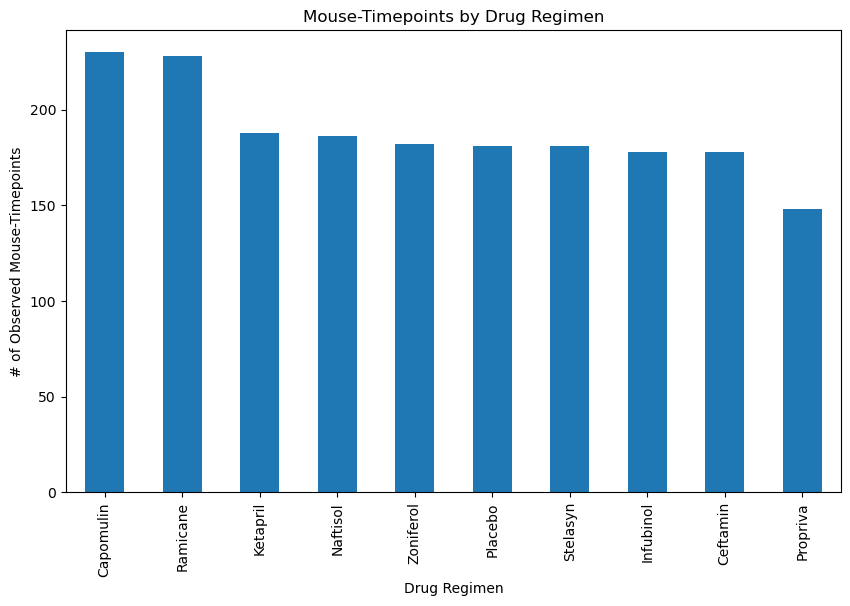

In [39]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
mouse_timepoints = cleaned_data['Drug Regimen'].value_counts()

# Using the aggregation method, produce the same summary statistics in a single line
mouse_timepoints.plot(kind='bar', figsize=(10, 6), ylabel='# of Observed Mouse-Timepoints', xlabel='Drug Regimen', title='Mouse-Timepoints by Drug Regimen')

## Bar and Pie Charts

<Axes: title={'center': 'Distribution of Mouse IDs by Drug Regimen'}, ylabel='Mouse ID'>

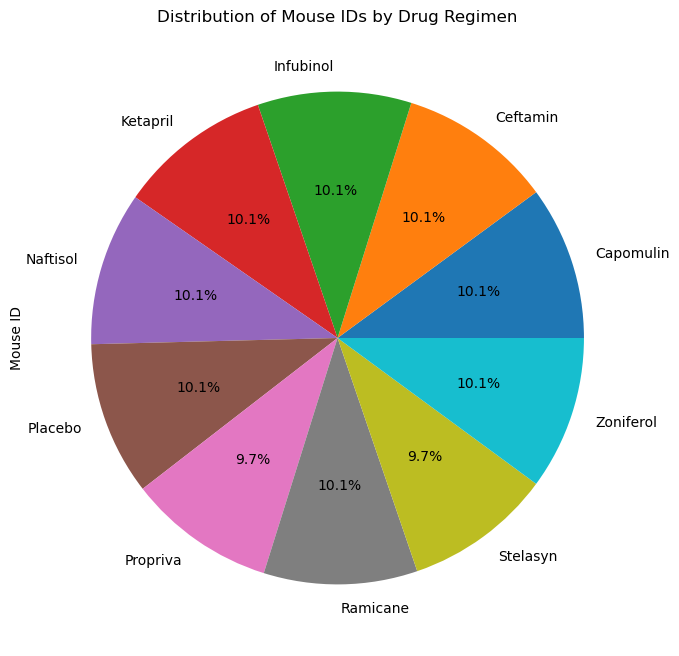

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
cleaned_data.groupby('Drug Regimen')['Mouse ID'].nunique().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Distribution of Mouse IDs by Drug Regimen')

<Axes: title={'center': 'Mouse-Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse-Timepoints'>

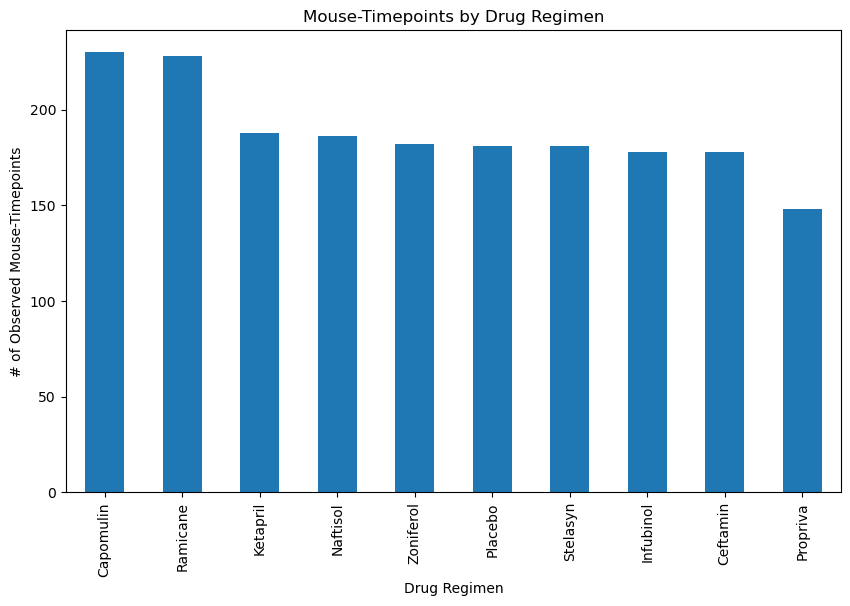

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_timepoints = cleaned_data['Drug Regimen'].value_counts()
mouse_timepoints.plot(kind='bar', figsize=(10, 6), ylabel='# of Observed Mouse-Timepoints', xlabel='Drug Regimen', title='Mouse-Timepoints by Drug Regimen')

<Axes: title={'center': 'Distribution of Male vs Female Mice'}, ylabel='count'>

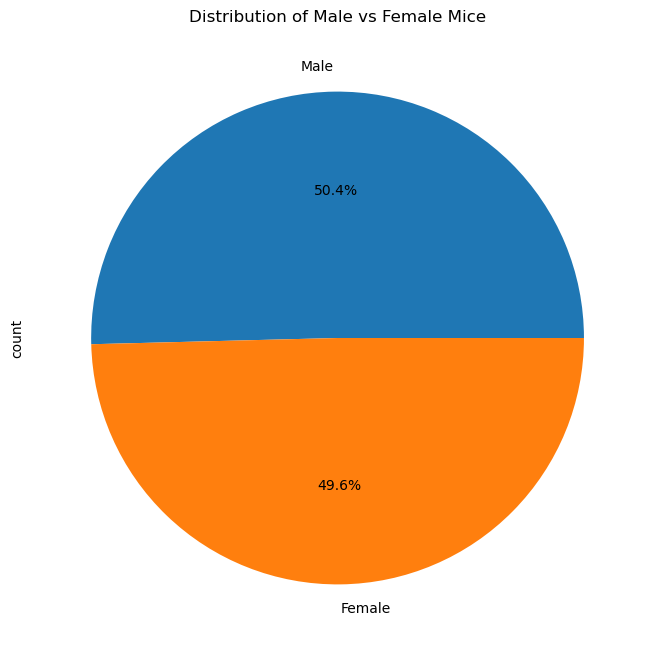

In [51]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice_gender = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()
gender_distribution = unique_mice_gender['Sex'].value_counts()
# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Distribution of Male vs Female Mice')

<Axes: title={'center': 'Distribution of Male vs Female Mice'}, ylabel='count'>

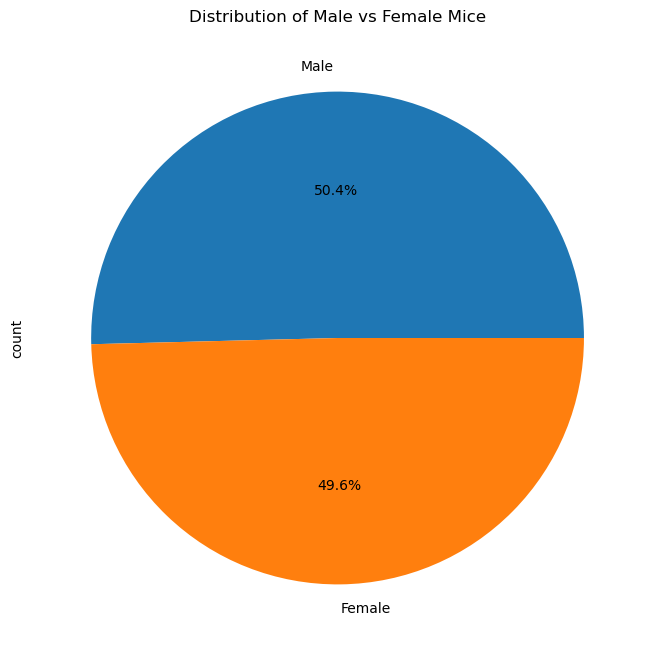

In [53]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
gender_distribution = unique_mice_gender['Sex'].value_counts()
# Get the unique mice with their gender
unique_mice_gender = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Distribution of Male vs Female Mice')

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()
final_tumor_volumes = pd.merge(max_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'])

In [57]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
 # add subset
for drug in treatments:
    drug_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_volumes.append(drug_data)

for drug, volumes in zip(treatments, tumor_volumes):
    # Calculate quartiles
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the bounds for outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify any outliers
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


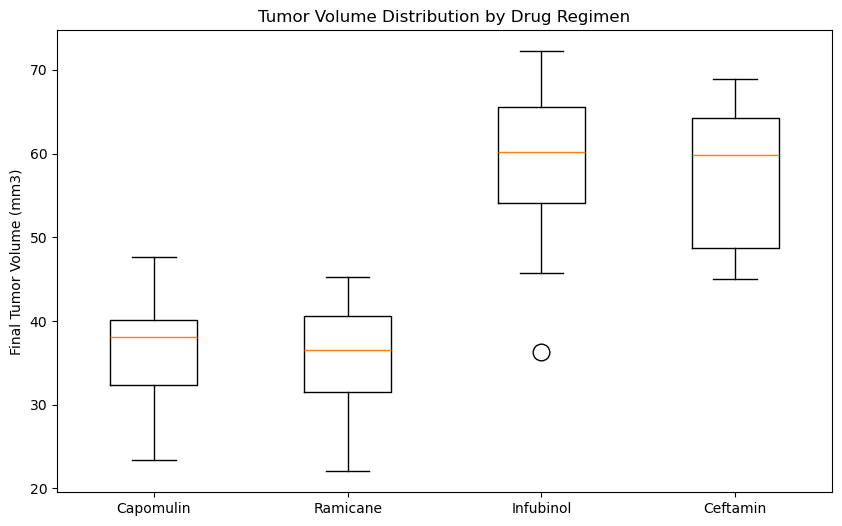

In [59]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(tumor_volumes, labels=treatments, flierprops=dict(marker='o', color='r', markersize=12))

# Add title and labels
ax.set_title('Tumor Volume Distribution by Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Show plot
plt.show()

## Line and Scatter Plots

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Ensure the Mouse ID is correctly capitalized and filtering is accurate
mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == 'I509') & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Check if the filtered data contains any records
if not mouse_data.empty:
    # Generate the line plot for tumor volume vs time point
    plt.figure(figsize=(8, 6))
    plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

    # Set the title and labels
    plt.title('Capomulin treatment of mouse I509')
    plt.xlabel('Timepoint (days)')
    plt.ylabel('Tumor Volume (mm3)')

    # Display the plot
    plt.show()
else:
    print("No data available for Mouse I509 with Capomulin regimen.")
    

No data available for Mouse I509 with Capomulin regimen.


In [82]:
# List all Mouse IDs treated with Capomulin
capomulin_mice = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()
print("Available Mouse IDs treated with Capomulin:", capomulin_mice)

Available Mouse IDs treated with Capomulin: ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


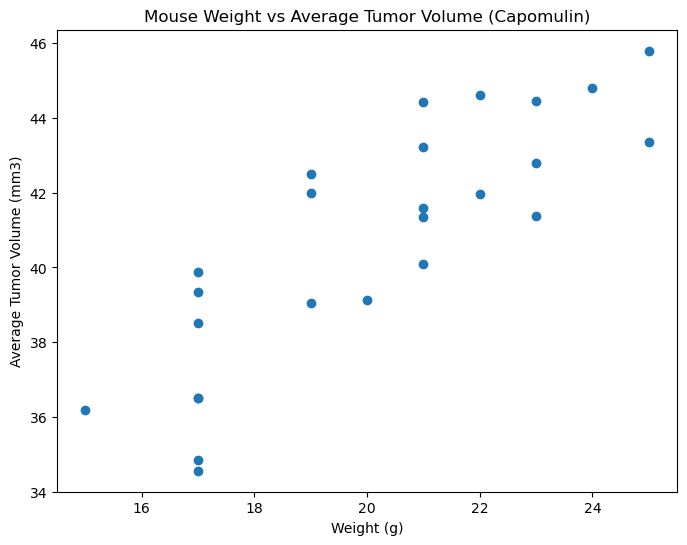

In [74]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for all mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume per mouse and their weight
average_tumor_volumes = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot for mouse weight vs average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, average_tumor_volumes)

# Set title and labels
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

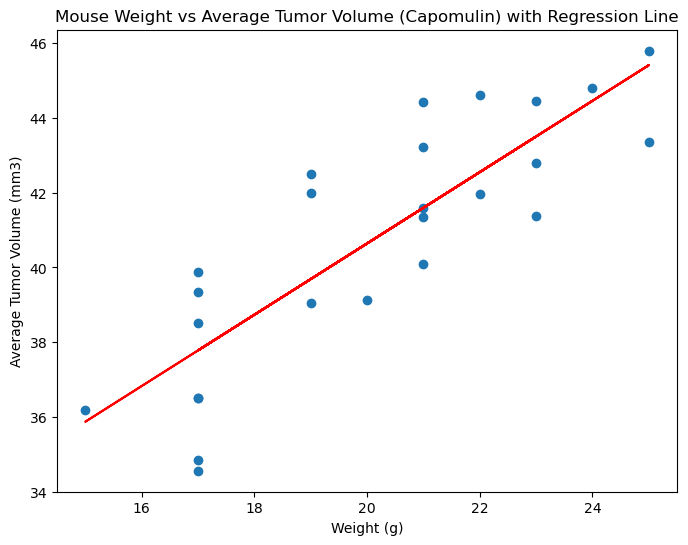

The correlation between mouse weight and the average tumor volume is 0.84


In [78]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
import numpy as np

# Filter data for all mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume per mouse and their weight
average_tumor_volumes = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(mouse_weights, average_tumor_volumes)

# Calculate predicted values (regression line)
regression_values = slope * mouse_weights + intercept

# Plot scatter plot and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, average_tumor_volumes)
plt.plot(mouse_weights, regression_values, color='red')

# Add title and labels
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin) with Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

# Display the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {r_value:.2f}")
